In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup as bs
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#opening the browser
driver = webdriver.Chrome(executable_path = 'C:\\Users\\daksh\\Downloads\\Chromedriver\\chromedriver.exe')

In [3]:
#maximizing the browser window
driver.maximize_window()

In [4]:
#opening instagram
driver.get('https://www.instagram.com/')

In [67]:
#username and password for login
username = 'SAMPLE USERNAME'
password = 'SAMPLE PASSWORD'

In [6]:
#initializing wait object
wait = WebDriverWait(driver, 10)

In [7]:
base_url = "https://www.instagram.com/"

In [8]:
#driver.find_element_by_xpath('//a[@href = "/"]').click()#To return to the home screen
#time.sleep(5)

In [9]:
def LogIn(username, password):
    
    try :
        
        #locating username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_name.send_keys(username)
        
        #locating password box and sending password
        pwd = driver.find_element_by_name('password')
        pwd.send_keys(password)
        
        #locating login button 
        login_button = driver.find_element(By.CSS_SELECTOR, 'button[type="submit"]')
        login_button.click()
        
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="_ac8f"]')))
        pop.click()
        
        time.sleep(5)
        
        #Turn on notificaton : Not Now
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//button[@class="_a9-- _a9_1"]')))
        button.click()
        
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [10]:
#Login to your Instagram Handle
LogIn(username, password)

In [12]:
def search_open_profile(s):
    try:
        
        driver.get('https://www.instagram.com/' + s + '/')
        time.sleep(3)
        
        '''
        #locating and clicking on search icon to make search visible
        search = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@aria-label="Search"]')))
        search.click()

        #locating serch bar and sending text
        search_box = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@aria-label="Search input"]')))
        search_box.clear()
        search_box.send_keys(s)
        
        time.sleep(5)
        
        #locating and clicking on the result
        res = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="x9f619 xjbqb8w x78zum5 x168nmei x13lgxp2 x5pf9jr xo71vjh xxbr6pl xbbxn1n xwib8y2 x1y1aw1k x1uhb9sk x1plvlek xryxfnj x1c4vz4f x2lah0s xdt5ytf xqjyukv x1qjc9v5 x1oa3qoh x1nhvcw1"]')))
        time.sleep(7)
        res.click()
        
        time.sleep(4)
        
        '''
        
        '''
        
        #clearing search bar
        driver.find_element_by_xpath('//div[@aria-label="Clear the search box"]').click()
        
        time.sleep(7)
        
        #locating and clicking on search icon to close search 
        search = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@aria-label="Search"]')))
        search.click()
        '''
    
    except TimeoutException :
        print('No Search Found!')

# Problem 1

1.

In [38]:
#First 10 handles from part-1
handles_list = ['foodtalkindia' , 'pranksterchandigarh' , 'foodieslovetowander' , 'street_food_chandigarh' , 
                'foodiekanyatales' , 'foodiebliss09' , 'delhifoodie' , 'yourfoodlab' , 'theglocaljournal',
                'food.darzee']

In [39]:
#function for getting top 5 handle which have highest number of followers
def top_5_handles(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #To return to the home screen
            driver.find_element_by_xpath('//a[@href = "/"]').click()
            time.sleep(5)
            
            #This fuction will search a user and open that profile
            search_open_profile(i)
            
            #locating followers of user
            follower_button = wait.until(EC.presence_of_element_located((By.XPATH,'//a[@class = "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _alvs _a6hd"]/span')))
            
            #replacing ',' with '' and converted into int
            dct[i] = int(follower_button.get_attribute('title').replace(',' , ''))
        
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        
        for i in sorted(dct, key = dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [40]:
top_handles = top_5_handles(handles_list)

In [41]:
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'->',top_handles[uname])

Top 5 instagram handles which have the highest number of followers :
yourfoodlab -> 2708060
foodtalkindia -> 309754
food.darzee -> 216563
theglocaljournal -> 183346
street_food_chandigarh -> 116742


2.

In [42]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    try :
        #locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        post.click()
        
        count = 0 
        while True :
            #getting date of the the post
            time.sleep(3)
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe')))
            
            time.sleep(3)
            
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            
            #locating next button
            next_but = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = " _aaqg _aaqh"]/button' )))
            time.sleep(3)
            next_but.click()
        #closing the post
        close = driver.find_element_by_xpath('//div[@class = "x1i10hfl x6umtig x1b1mbwd xaqea5y xav7gou x9f619 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x6s0dn4 x78zum5 xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x1ypdohk xl56j7k x1y1aw1k x1sxyh0 xwib8y2 xurb0ha"]')
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [43]:
total_post_count = {}
for i in top_handles :
    #To return to the home screen
    driver.find_element_by_xpath('//a[@href = "/"]').click()
    time.sleep(8)
    
    #This fuction will search a user and open that profile
    search_open_profile(i)
    time.sleep(2)
    
    count = count_of_post(3)
    total_post_count[i] = count

In [44]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
yourfoodlab 2
foodtalkindia 3
food.darzee 3
theglocaljournal 1
street_food_chandigarh 4


3.

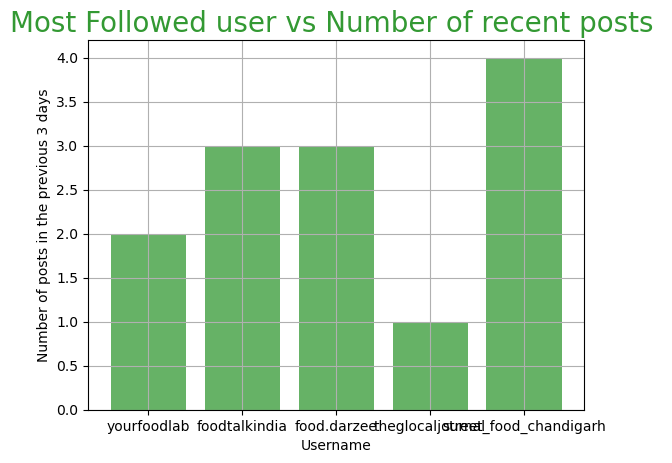

In [45]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()

plt.bar(x,y,color='g',alpha=0.6)

plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)

plt.grid()
plt.show()

# Problem 2

1.

In [46]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            
            #To return to the home screen
            driver.find_element_by_xpath('//a[@href = "/"]').click()
            time.sleep(8)
            
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            
            #locating the post of the user
            posts = driver.find_elements_by_class_name('_aagw')
            
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                
                #locating all hashtag used in this post
                hashtags = driver.find_elements_by_xpath('//a[@class = "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz  _aa9_ _a6hd"]')
                
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                close = driver.find_element_by_xpath('//div[@class = "x1i10hfl x6umtig x1b1mbwd xaqea5y xav7gou x9f619 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x6s0dn4 x78zum5 xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x1ypdohk xl56j7k x1y1aw1k x1sxyh0 xwib8y2 xurb0ha"]')
                time.sleep(4)
                close.click()
        
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [47]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)

In [48]:
print(hashtags)

['#GiveawayAlert', '#ThumsUpBiryaniHunt', '#Toofanicombo', '#GiveawayAlert', '#SwiggyVouchers', '#yourfoodlab', '#foodporn', '#sanjyotkeer', '#goanfishcurry', '#GiveawayAlert', '#ThumsUpBiryaniHunt', '#Toofanicombo', '#SwiggyVouchers', '#ad', '#paidpartnership', '#yourfoodlab', '#sanjyotkeer', '#foodporn', '#kutchidabeli', '#ftiinsider', '#eateries', '#bar', '#delhi', '#vasantvihar', '#recommends', '#food', '#foodtalkindia', '#foodiesofindia', '#foodblogger', '#delicious', '#yummy', '#instafood', '#discover', '#soul', '#newdelhi', '#theashok', '#restaurant', '#spanishthemed', '#food', '#drinks', '#foodtalkindia', '#delicious', '#yummy', '#instafood', '#discover', '#NextSip', '#worldginday', '#lair', '#delhi', '#basantlok', '#food', '#cocktails', '#drinks', '#foodtalkindia', '#delicious', '#yummy', '#instafood', '#discover', '#worldginday', '#foodpairings', '#gin', '#drinks', '#food', '#foodtalkindia', '#delicious', '#yummy', '#instafood', '#discover', '#LuxeList', '#lepetitchef', '#imm

2.

In [53]:
dct = {}
words_list = []

# finding frequency of each hashtag
for word in hashtags:
    dct[word] = dct.get(word,0) + 1

#droping  NULL hashtag
dct.pop('', 0)
    
#making a list of lists for csv file
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#streetfood 17
#delicious 11
#yummy 10
#discover 10
#streetfoodchandigarh 10
#foodtalkindia 9
#instafood 9
#fooddarzee 9
#reels 9
#reelsinstagram 9
#food 8
#reelkarofeelkaro 8
#reelindia 8
#reel 8
#reelsvideo 8
#kulcha 8
#amritsarikulcha 8
#amritsar 8
#amritsarstreetfood 8
#delhi 5
#foodiesofindia 5
#foodblogger 5
#travel 5
#drinks 4
#healthyfood 4
#GiveawayAlert 3
#traveller 3
#explore 3
#ThumsUpBiryaniHunt 2
#Toofanicombo 2
#SwiggyVouchers 2
#yourfoodlab 2
#foodporn 2
#sanjyotkeer 2
#ftiinsider 2
#worldginday 2
#tastyfood 2
#tastymeals 2
#HealthyEating 2
#dietconsultation 2
#dietplan 2
#trending 2
#goa 2
#goabeach 2
#goadiaries 2
#mousse 2
#pastry 2
#goanfishcurry 1
#ad 1
#paidpartnership 1
#kutchidabeli 1
#eateries 1
#bar 1
#vasantvihar 1
#recommends 1
#soul 1
#newdelhi 1
#theashok 1
#restaurant 1
#spanishthemed 1
#NextSip 1
#lair 1
#basantlok 1
#cocktails 1
#foodpairings 1
#gin 1
#LuxeList 1
#lepetitchef 1
#immersive 1
#dining 1
#ShangriLa 1
#LPCatShangrila 1
#LPCinDelhi 1
#kachori

3.

In [54]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])

#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#streetfood,17
1,#delicious,11
2,#yummy,10
3,#discover,10
4,#streetfoodchandigarh,10
5,#foodtalkindia,9
6,#instafood,9
7,#fooddarzee,9
8,#reels,9
9,#reelsinstagram,9


4.

In [55]:
print(words_list[0][0])

#streetfood


5.

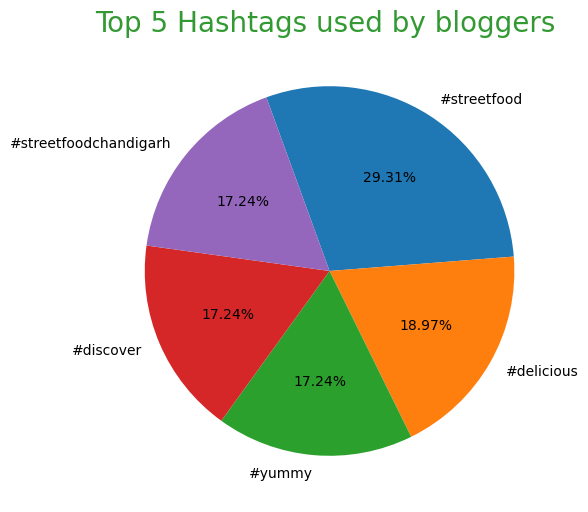

In [56]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]

plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)

plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

# Problem 3

1.

In [59]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
            likes = []
            
            #To return to the home screen
            driver.find_element_by_xpath('//a[@href = "/"]').click()
            time.sleep(8)
            
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(8)
            
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            
            #locating the post of the user
            #posts = driver.find_elements_by_class_name('_aagw')
            
            #posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
            
            i = 0
            
            while i < 10 :
                #locating posts of the user
                posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
                #extracting link of the post under consideration
                data = bs(posts[i].get_attribute("outerHTML"),"html.parser")
                
                #opening post in a new web page
                url=base_url+ data.a["href"]
                driver.get(url)
                time.sleep(5)
                
                # waiting for likes to load
                like = wait.until(EC.presence_of_element_located((By.XPATH,'//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]/span')))
                
                #extracting number of likes
                time.sleep(8)
                no_of_likes = (like.text).replace(',' , '').strip()
                likes.append(int(no_of_likes))
                time.sleep(1)
                
                driver.back()
                
                time.sleep(5)
                
                i = i + 1
            
            '''
            
            for post in posts[:10]:
                post.click()
                time.sleep(7)
                
                like = wait.until(EC.presence_of_element_located((By.XPATH,'//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]/span')))
                #like = driver.find_element_by_xpath('//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]/span')
                time.sleep(8)
                no_of_likes = (like.text).replace(',' , '').strip()
                likes.append(int(no_of_likes))
                time.sleep(1)
                
                #locating close button and clicking on it
                close = driver.find_element_by_xpath('//div[@class = "x1i10hfl x6umtig x1b1mbwd xaqea5y xav7gou x9f619 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x6s0dn4 x78zum5 xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x1ypdohk xl56j7k x1y1aw1k x1sxyh0 xwib8y2 xurb0ha"]')
                time.sleep(4)
                close.click()
            '''

                
            return likes
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [60]:
#dct will store username with list of likes
dct = {}

for user in handles : 
    
    likes = get_likes(user)
    
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of yourfoodlab :
5741 Likes
26317 Likes
39960 Likes
12411 Likes
29699 Likes
4666 Likes
9437 Likes
16765 Likes
37285 Likes
41028 Likes

Number of likes of the top 10 posts of foodtalkindia :
205 Likes
259 Likes
178 Likes
294 Likes
273 Likes
400 Likes
159 Likes
222 Likes
208 Likes
361 Likes

Number of likes of the top 10 posts of food.darzee :
538 Likes
163 Likes
32 Likes
37 Likes
115 Likes
119 Likes
441 Likes
54 Likes
58 Likes
1059 Likes

Number of likes of the top 10 posts of theglocaljournal :
947 Likes
2081 Likes
1951 Likes
815 Likes
1954 Likes
2245 Likes
3732 Likes
2723 Likes
6232 Likes
6233 Likes

Number of likes of the top 10 posts of street_food_chandigarh :
792 Likes
248 Likes
1425 Likes
1002 Likes
1070 Likes
1213 Likes
49340 Likes
594 Likes
800 Likes
1058 Likes



2.

In [61]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    
    avg_likes = {}
    
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    
    return avg_likes

In [62]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')

for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
yourfoodlab : 22330
foodtalkindia : 255
food.darzee : 261
theglocaljournal : 2891
street_food_chandigarh : 5754


3.

In [63]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    
    return foll_like

In [64]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from top_handles
top_handles_names = list(top_handles.keys())

#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')

for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
yourfoodlab : 121
foodtalkindia : 1214
food.darzee : 829
theglocaljournal : 63
street_food_chandigarh : 20


4.

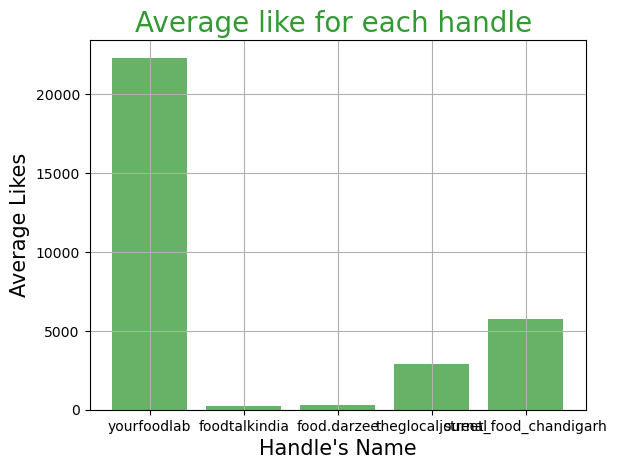

In [65]:
#Plotting Bar Graph for average likes of each handle
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='g',alpha=0.6)

plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)

plt.grid()
plt.show()

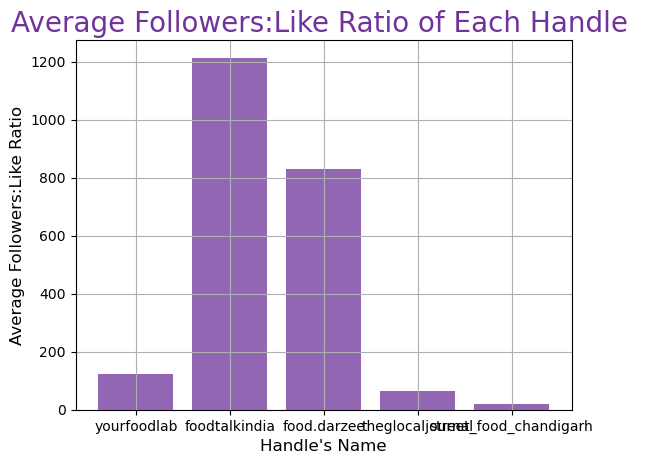

In [66]:
# Plotting Bar Graph for average followers:like ratio of each handle
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)

plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)

plt.grid()
plt.show()